In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading in Data

In [47]:
fa_datapath = "../data/Food Insecurity Rates -Tracts - Illinois.xlsx"
fa = pd.read_excel(fa_datapath, sheet_name=0)
fa.head()

,Tract,FIPS,State,Total Population,2018 Food Insecurity,2018 Food Insecurity #,[C] 2020 Food Insecurity,[C] 2020 Food Insecurity #,[C] 2020 Food Insecurity # Change,[C] Adjusted Annual Unemployment Change
0,"Census Tract 1001, Cook County, Illinois",17031,IL,"5,563",0.099,550,0.149,820,270,0.07
1,"Census Tract 1002, Cook County, Illinois",17031,IL,"6,872",0.060,410,0.110,750,340,0.07
2,"Census Tract 1003, Cook County, Illinois",17031,IL,"6,186",0.074,460,0.123,770,310,0.07
3,"Census Tract 1004, Cook County, Illinois",17031,IL,"3,364",0.055,180,0.104,350,170,0.07
4,"Census Tract 1005, Cook County, Illinois",17031,IL,"5,696",0.052,290,0.101,570,280,0.07


In [48]:
#convert Total Population to int
fa['Total Population'] = fa['Total Population'].apply(lambda x: int(x.replace(",","")))
fa['2018 Food Insecurity #'] = fa['2018 Food Insecurity #'].apply(lambda x: int(x.replace(",", "")))
fa['[C] 2020 Food Insecurity #'] = fa['[C] 2020 Food Insecurity #'].apply(lambda x: int(x.replace(",", "")))


In [51]:
#clean up column names
fa.columns = [col_name.replace("[C]","") for col_name in fa.columns]
fa.columns = [col_name.replace("#","No.") for col_name in fa.columns]
fa.head()

,Tract,FIPS,State,Total Population,2018 Food Insecurity,2018 Food Insecurity No.,2020 Food Insecurity,2020 Food Insecurity No.,2020 Food Insecurity No. Change,Adjusted Annual Unemployment Change
0,"Census Tract 1001, Cook County, Illinois",17031,IL,5563,0.099,550,0.149,820,270,0.07
1,"Census Tract 1002, Cook County, Illinois",17031,IL,6872,0.060,410,0.110,750,340,0.07
2,"Census Tract 1003, Cook County, Illinois",17031,IL,6186,0.074,460,0.123,770,310,0.07
3,"Census Tract 1004, Cook County, Illinois",17031,IL,3364,0.055,180,0.104,350,170,0.07
4,"Census Tract 1005, Cook County, Illinois",17031,IL,5696,0.052,290,0.101,570,280,0.07


# Correlational Analysis

In [55]:
#total population is almost perfectly corr with the 2020 food insecurity change (tracts with larger populations have larger changes in # of food insecure individuals)
# total population is slightly negatively corr with 2018, 2020 Food insecurity rate. More populous tracts have slightly lower food insecurity rates in 2018, 2020.
#there is barely any corr between unemployment rate and the rest of the variables. 
#2020 food insecurity rates are almost perfectly correlated with 2018 food insecurity rates 
fa.drop('FIPS', axis = 1).corr()

,Total Population,2018 Food Insecurity,2018 Food Insecurity No.,2020 Food Insecurity,2020 Food Insecurity No.,2020 Food Insecurity No. Change,Adjusted Annual Unemployment Change
Total Population,1.000000e+00,-3.521685e-01,4.064972e-01,-3.522388e-01,6.053738e-01,9.995254e-01,2.670951e-15
2018 Food Insecurity,-3.521685e-01,1.000000e+00,5.933338e-01,9.999857e-01,4.281980e-01,-3.531307e-01,-1.058890e-15
2018 Food Insecurity No.,4.064972e-01,5.933338e-01,1.000000e+00,5.932589e-01,9.732618e-01,4.058429e-01,-8.928148e-16
2020 Food Insecurity,-3.522388e-01,9.999857e-01,5.932589e-01,1.000000e+00,4.281146e-01,-3.532027e-01,-2.599570e-15
2020 Food Insecurity No.,6.053738e-01,4.281980e-01,9.732618e-01,4.281146e-01,1.000000e+00,6.049230e-01,-5.158455e-16
2020 Food Insecurity No. Change,9.995254e-01,-3.531307e-01,4.058429e-01,-3.532027e-01,6.049230e-01,1.000000e+00,1.495492e-15
Adjusted Annual Unemployment Change,2.670951e-15,-1.058890e-15,-8.928148e-16,-2.599570e-15,-5.158455e-16,1.495492e-15,1.000000e+00


# Visualizations

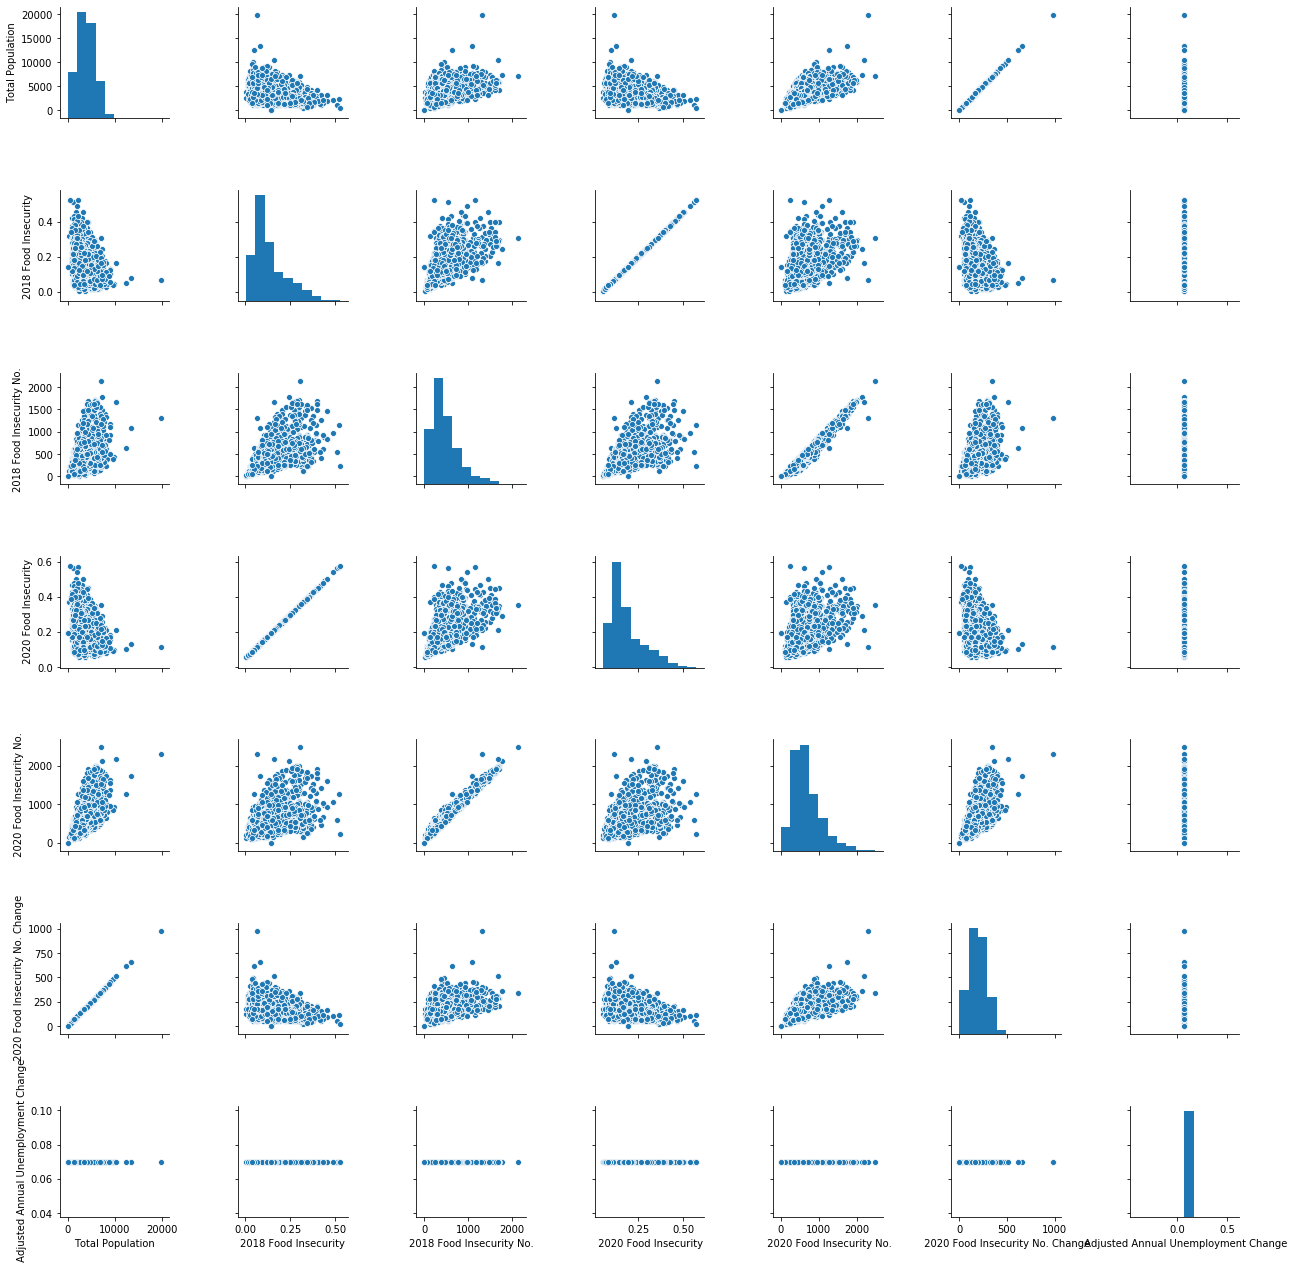

In [64]:
sns.pairplot(fa.drop('FIPS', axis = 1))
plt.savefig("../Plots/fa_scattermatrix.png")

In [62]:
#average unemployment change is basically constant, with just one number 0.07
#fa.columns
fa[' Adjusted Annual Unemployment Change'].unique()

array([0.07])

In [63]:
plt.savefig()

TypeError: savefig() missing 1 required positional argument: 'fname'

<Figure size 432x288 with 0 Axes>